# Credit Card Fraud Detection using random forest

Steps
1. Import libraries
2. Import the datase
3. Perform data analysis (data cleaning, data  manipulation, data visualization, EDA)
4. Data Preprocessing - feature engineering (encoders, scaling, feature selection, hyper-parameter tuning)
5. Splitting the dataset 
6. Model selection
7. Train the model
8. Test the model
9. Performance metric

In [83]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier #for feature selection

In [84]:
df = pd.read_csv('creditcard.csv')

In [85]:
df.head()

,Unnamed: 0,Time,V1,V2,V3,V4,V5,V6,V7,V8,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
2,16,12.0,1.103215,-0.040296,1.267332,1.289091,-0.735997,0.288069,-0.586057,0.189380,...,-0.024612,0.196002,0.013802,0.103758,0.364298,-0.382261,0.092809,0.037051,12.99,0
3,24,22.0,-1.946525,-0.044901,-0.405570,-1.013057,2.941968,2.955053,-0.063063,0.855546,...,-0.579526,-0.799229,0.870300,0.983421,0.321201,0.149650,0.707519,0.014600,0.89,0
4,32,26.0,-0.529912,0.873892,1.347247,0.145457,0.414209,0.100223,0.711206,0.176066,...,0.046949,0.208105,-0.185548,0.001031,0.098816,-0.552904,-0.073288,0.023307,6.14,0


In [86]:
df.shape

(35601, 32)

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35601 entries, 0 to 35600
Data columns (total 32 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  35601 non-null  int64  
 1   Time        35601 non-null  float64
 2   V1          35601 non-null  float64
 3   V2          35601 non-null  float64
 4   V3          35601 non-null  float64
 5   V4          35601 non-null  float64
 6   V5          35601 non-null  float64
 7   V6          35601 non-null  float64
 8   V7          35601 non-null  float64
 9   V8          35601 non-null  float64
 10  V9          35601 non-null  float64
 11  V10         35601 non-null  float64
 12  V11         35601 non-null  float64
 13  V12         35601 non-null  float64
 14  V13         35601 non-null  float64
 15  V14         35601 non-null  float64
 16  V15         35601 non-null  float64
 17  V16         35601 non-null  float64
 18  V17         35601 non-null  float64
 19  V18         35601 non-nul

In [88]:
df.describe()

,Unnamed: 0,Time,V1,V2,V3,V4,V5,V6,V7,V8,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,35601.000000,35601.000000,35601.000000,35601.000000,35601.000000,35601.000000,35601.000000,35601.000000,35601.000000,35601.000000,...,35601.000000,35601.000000,35601.000000,35601.000000,35601.000000,35601.000000,35601.000000,35601.000000,35601.000000,35601.000000
mean,142400.000000,94812.014410,-0.002380,-0.008317,0.005346,0.012968,-0.010151,0.004057,-0.002803,-0.000355,...,-0.002958,0.001706,-0.005300,0.004641,0.002358,0.000055,0.001532,-0.002413,89.795633,0.001798
std,82218.142426,47489.245882,1.972213,1.654946,1.526369,1.435603,1.414982,1.344112,1.267992,1.167159,...,0.704891,0.724073,0.721713,0.604273,0.530030,0.480235,0.407553,0.332522,263.079235,0.042362
min,0.000000,0.000000,-35.698345,-60.464618,-32.454198,-5.401678,-42.147898,-17.574835,-31.197329,-34.535000,...,-14.017988,-9.499423,-44.807735,-2.790479,-10.295397,-2.604551,-9.543518,-9.617915,0.000000,0.000000
25%,71200.000000,54201.000000,-0.923392,-0.599743,-0.881833,-0.847147,-0.703751,-0.763222,-0.561610,-0.208275,...,-0.228652,-0.539284,-0.162742,-0.348998,-0.317835,-0.324968,-0.071381,-0.053415,5.670000,0.000000
50%,142400.000000,84690.000000,0.019962,0.060751,0.175930,-0.018970,-0.066888,-0.279785,0.033962,0.024610,...,-0.026993,0.008565,-0.011065,0.043805,0.023204,-0.051128,0.001341,0.010691,21.950000,0.000000
75%,213600.000000,139320.000000,1.315863,0.799453,1.032465,0.755936,0.602593,0.396178,0.571181,0.323402,...,0.186310,0.532635,0.147418,0.439368,0.354478,0.237443,0.089992,0.076702,77.500000,0.000000
max,284800.000000,172784.000000,2.430507,17.930550,3.883768,16.875344,23.046242,22.529298,36.677268,20.007208,...,22.579714,4.534454,18.946734,3.998294,5.521140,3.463246,11.135740,15.870474,18910.000000,1.000000


In [89]:
df.columns

Index(['Unnamed: 0', 'Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8',
       'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18',
       'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28',
       'Amount', 'Class'],
      dtype='object')

In [90]:
df.Class.value_counts()

0    35537
1       64
Name: Class, dtype: int64

<AxesSubplot:>

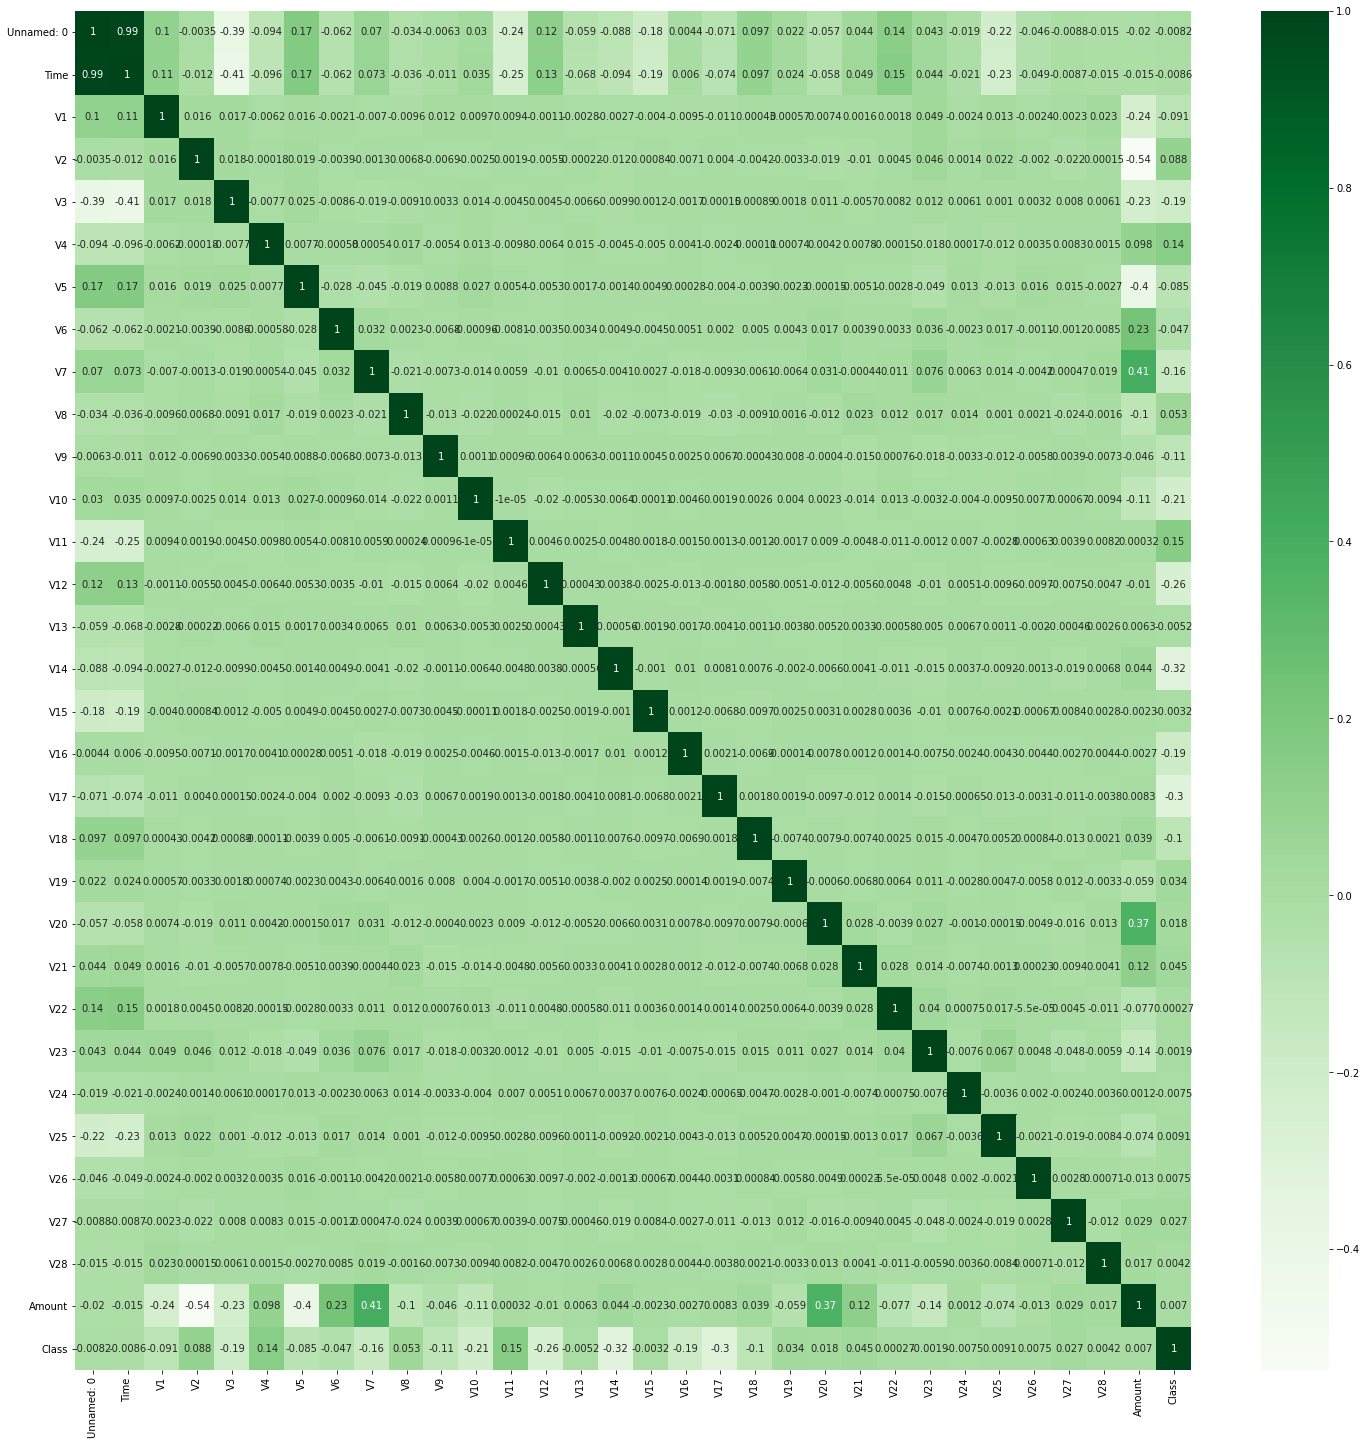

In [91]:
plt.figure(figsize = (25,25))
sns.heatmap(df.corr(), annot = True, cmap = 'Greens')

# Handling imbalanced dataset

In [92]:
pip install imbalanced-learn 

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\python38\python.exe -m pip install --upgrade pip' command.


In [93]:
from imblearn.over_sampling import SMOTE

In [94]:
x = df.drop('Class', axis = 'columns')
y = df['Class']

In [95]:
smote = SMOTE(sampling_strategy = 'minority')
x_sm, y_sm = smote.fit_resample(x,y)

y_sm.value_counts()

0    35537
1    35537
Name: Class, dtype: int64

# Feature Selection/Feature Importance

In [96]:
model = ExtraTreesClassifier()
model.fit(x_sm, y_sm)

ExtraTreesClassifier()

In [97]:
model.feature_importances_

array([0.01210902, 0.01095504, 0.01356494, 0.01838291, 0.08343897,
       0.11964901, 0.0053996 , 0.00983919, 0.01943958, 0.00936594,
       0.04512878, 0.06643641, 0.08403243, 0.10892133, 0.00794875,
       0.13819227, 0.00561947, 0.06693232, 0.07024957, 0.02938745,
       0.02107185, 0.00746063, 0.00460567, 0.0044134 , 0.00303966,
       0.00673361, 0.00409397, 0.00632548, 0.00884593, 0.0033717 ,
       0.00504511])

<AxesSubplot:>

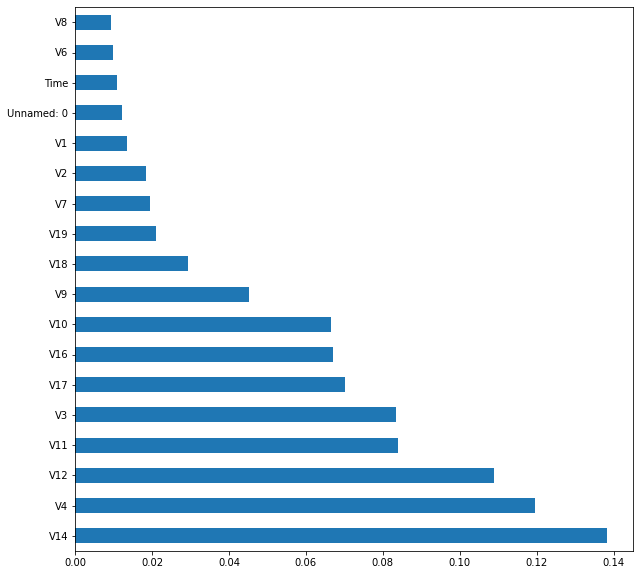

In [98]:
plt.figure(figsize = (10,10))
feat = pd.Series(model.feature_importances_, index = x_sm.columns)
feat.nlargest(18).plot(kind = 'barh')

In [99]:
plot = feat.nlargest(18)

In [100]:
plot.index

Index(['V14', 'V4', 'V12', 'V11', 'V3', 'V17', 'V16', 'V10', 'V9', 'V18',
       'V19', 'V7', 'V2', 'V1', 'Unnamed: 0', 'Time', 'V6', 'V8'],
      dtype='object')

In [101]:
cols = ['V14', 'V11', 'V12', 'V17', 'V4', 'V10', 'V3', 'V16', 'V18', 'V9', 'V1',
       'V2', 'V7', 'V19', 'Time', 'V8', 'V21', 'V13']

In [102]:
x_new = x_sm[cols]

In [103]:
x_sm.shape

(71074, 31)

In [104]:
x_new.shape

(71074, 18)

# Train Test Split

In [105]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_new, y_sm, test_size = 0.2, random_state = 42)

In [106]:
randomf = RandomForestClassifier()

In [107]:
randomf.fit(X_train, y_train)

RandomForestClassifier()

In [108]:
y_pred = randomf.predict(X_test)

In [109]:
accuracy_score(y_test, y_pred)

0.9998593035525853